Problemy:
* Nefunguje s cyklickymi atraktormi
* Ako pracovat s asynchornnou semantikou (dalsie typy atroaktorov -- complex)
* Ako priemerovat cez parametrizacie
* Nevie najst atraktory, len driver sety k uz znamym atraktorom

Otazky
* Aky je suvis medzi atraktormi v synchronnej a asynchronnej semantike?
* "Partially defined" a "Parametrized" znamena to iste?

In [2]:
import time
import matplotlib.pyplot as plt
import numpy as np

from cana.boolean_node import *
from cana.boolean_network import *

from utils import *
from modules import *
from mean_field_computations import *
from brute_force_computations import *
from simulations import *
from entropy_computations import *
from driver_sets import *

In [3]:
N=BooleanNetwork.from_file('../models/DROSOPHILA-CELL-CYCLE.cana',file_type='logical')

In [4]:
dd={node.name: LUT_reduce(look_up_table(node)) for node in N.nodes}
sunits,sunit_map=get_sunits(N)
rsunit_map = reverse_sunit_map(sunit_map)
for n in N.nodes:
    print n.name

v_Notch
v_Ago
v_CycD
v_CycA
v_CycB
v_CycE
v_Dap
v_E2F
v_Fzr
v_Fzy
v_Rb
v_Rux
v_Stg
v_Wee1


In [5]:
def run_IBMFA(N, iterations, update, act_nodes=set(), inh_nodes=set()):
    assert update in 'AS'
    act_prob = {i: {node.name: (1 if node.name in act_nodes else 0 if node.name in inh_nodes else 0.5)
                    for node in N.nodes}
                for i in range(iterations+1)}
    if update == 'S':
        synchronous_mf(N,act_nodes=act_nodes | inh_nodes,act_prob=act_prob,iterations=iterations,pinning=set(),
                       reduced=True,ds=dd,pin_start=True)
    else:
        asynchronous_mf(N,act_nodes=act_nodes | inh_nodes,act_prob=act_prob,iterations=iterations,pinning=set(),
                        reduced=True,ds=dd,pin_start=True,order=None,regenerate=False,oh=False)
    return act_prob

In [6]:
def plot_IBMFA(probs):
    for node in N.nodes:
        plt.plot(range(len(probs)), [probs[i][node.name] for i in range(len(probs))], label=node.name)
    plt.legend(bbox_to_anchor=(1.0, 0.95), fontsize=14)
    plt.show()

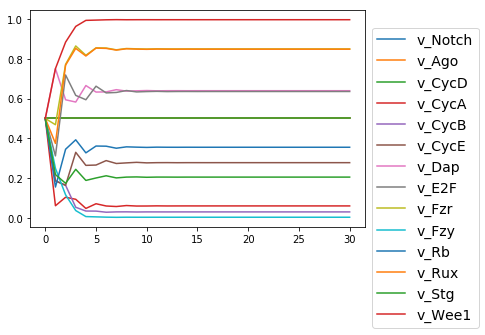

In [7]:
probs = run_IBMFA(N, 30, 'S')
plot_IBMFA(probs)

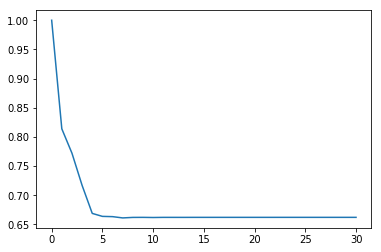

{0: 1.0,
 1: 0.8138816044543077,
 2: 0.7720833699888818,
 3: 0.7168853213299077,
 4: 0.6688946745075395,
 5: 0.6637966887120254,
 6: 0.663339258032793,
 7: 0.6611531431632098,
 8: 0.662021325757314,
 9: 0.662103854792971,
 10: 0.6618649156457945,
 11: 0.6620897098336861,
 12: 0.6620792610310043,
 13: 0.6620600982137628,
 14: 0.6621068656870538,
 15: 0.6621022109778797,
 16: 0.662104599914209,
 17: 0.6621139707149482,
 18: 0.6621133622064861,
 19: 0.6621151802675244,
 20: 0.662117111978205,
 21: 0.6621172477035613,
 22: 0.6621179080932343,
 23: 0.6621183446435218,
 24: 0.6621184687654595,
 25: 0.6621186720021962,
 26: 0.6621187840674889,
 27: 0.6621188397640886,
 28: 0.6621188992978111,
 29: 0.6621189314460256,
 30: 0.6621189518971848}

In [8]:
entropy, _ = config_entropy(probs, nodes=set(probs[0].keys()))
plt.plot(entropy.keys(), entropy.values())
plt.show()
entropy

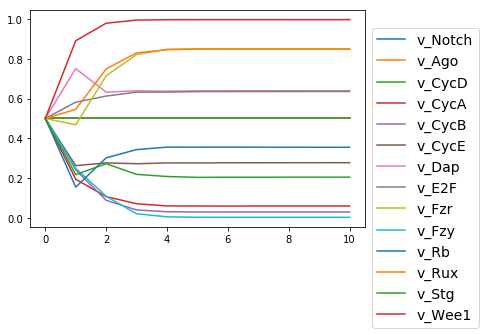

In [9]:
probs_A = run_IBMFA(N, 10, 'A')
plot_IBMFA(probs_A)

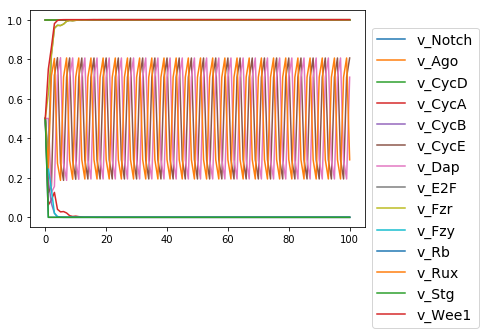

In [10]:
probs = run_IBMFA(N, 100, 'S', act_nodes={'v_CycD', 'v_Ago', 'v_Notch'})
plot_IBMFA(probs)

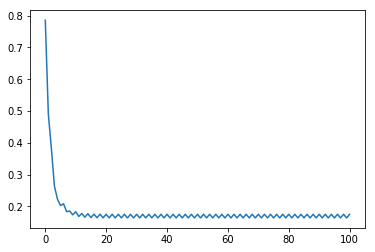

{0: 0.7857142857142857,
 1: 0.49009809848419117,
 2: 0.382307683771041,
 3: 0.26357324495299955,
 4: 0.22260851840045778,
 5: 0.20255715083228323,
 6: 0.20807708388604668,
 7: 0.18326474823463673,
 8: 0.18524809398262004,
 9: 0.17339474276028952,
 10: 0.18298396384235757,
 11: 0.1682822882754085,
 12: 0.17738745467941874,
 13: 0.16597666715033554,
 14: 0.17683589525854027,
 15: 0.16463698753797903,
 16: 0.17554746236375346,
 17: 0.16413592956541198,
 18: 0.17541836338257039,
 19: 0.16380135875400573,
 20: 0.1751324218466722,
 21: 0.16369637517209393,
 22: 0.1751029152047901,
 23: 0.16361549590549157,
 24: 0.17504059108584885,
 25: 0.1635938761351964,
 26: 0.17503393977042903,
 27: 0.16357476479376912,
 28: 0.1750204612001663,
 29: 0.16357033912912522,
 30: 0.17501897430269406,
 31: 0.16356589794688994,
 32: 0.17501606604570963,
 33: 0.16356499121751175,
 34: 0.17501573542222307,
 35: 0.16356397223310157,
 36: 0.17501510762865177,
 37: 0.16356378555798326,
 38: 0.17501503438907215,
 39:

In [11]:
entropy, _ = config_entropy(probs, nodes=set(probs[0].keys()))
plt.plot(entropy.keys(), entropy.values())
plt.show()
entropy

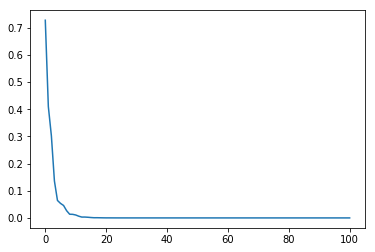

{0: 0.7272727272727273,
 1: 0.40968461919272253,
 2: 0.302065701618306,
 3: 0.13570652752756904,
 4: 0.06425532936563215,
 5: 0.05342064836656915,
 6: 0.04578040699994545,
 7: 0.026655676219596768,
 8: 0.013559126051663933,
 9: 0.013152870296254572,
 10: 0.010752717384309801,
 11: 0.0063151879382742394,
 12: 0.0031052416696230743,
 13: 0.003187015962045946,
 14: 0.002425750026840941,
 15: 0.001428540876541271,
 16: 0.0006918207458390036,
 17: 0.0007500511638940183,
 18: 0.0005332302361653163,
 19: 0.0003154298953838236,
 20: 0.00015194831007813824,
 21: 0.00017323717969549042,
 22: 0.00011574293872745747,
 23: 6.882824221031487e-05,
 24: 3.315792976721569e-05,
 25: 3.9515197467234686e-05,
 26: 2.4997342295127374e-05,
 27: 1.4941887579001761e-05,
 28: 7.218987366436842e-06,
 29: 8.934105748458348e-06,
 30: 5.393593804450809e-06,
 31: 3.2385767048074494e-06,
 32: 1.571200820651823e-06,
 33: 2.0064723493329552e-06,
 34: 1.164885478521159e-06,
 35: 7.020041709665127e-07,
 36: 3.42123349916

In [12]:
entropy, _ = config_entropy(probs, nodes=set(probs[0].keys()) - {'v_CycE', 'v_Dap', 'v_Rux'})
plt.plot(entropy.keys(), entropy.values())
plt.show()
entropy

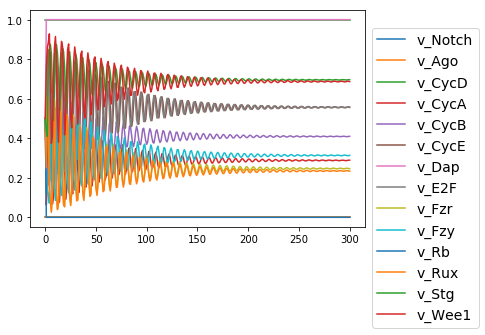

In [13]:
probs = run_IBMFA(N, 300, 'S', act_nodes={'v_CycD'}, inh_nodes={'v_Ago', 'v_Notch'})
plot_IBMFA(probs)

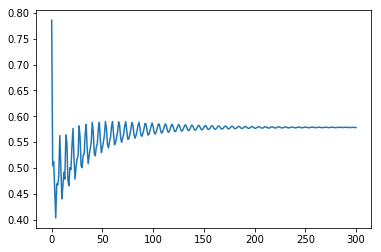

In [14]:
entropy, _ = config_entropy(probs)
plt.plot(entropy.keys(), entropy.values())
plt.show()

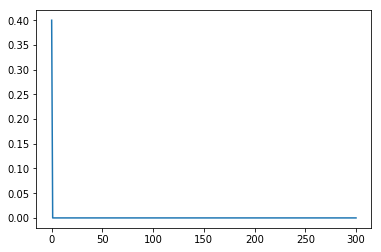

{0: 0.4,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 34: 0.0,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.0,
 44: 0.0,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.0,
 49: 0.0,
 50: 0.0,
 51: 0.0,
 52: 0.0,
 53: 0.0,
 54: 0.0,
 55: 0.0,
 56: 0.0,
 57: 0.0,
 58: 0.0,
 59: 0.0,
 60: 0.0,
 61: 0.0,
 62: 0.0,
 63: 0.0,
 64: 0.0,
 65: 0.0,
 66: 0.0,
 67: 0.0,
 68: 0.0,
 69: 0.0,
 70: 0.0,
 71: 0.0,
 72: 0.0,
 73: 0.0,
 74: 0.0,
 75: 0.0,
 76: 0.0,
 77: 0.0,
 78: 0.0,
 79: 0.0,
 80: 0.0,
 81: 0.0,
 82: 0.0,
 83: 0.0,
 84: 0.0,
 85: 0.0,
 86: 0.0,
 87: 0.0,
 88: 0.0,
 89: 0.0,
 90: 0.0,
 91: 0.0,
 92: 0.0,
 93: 0.0,
 94: 0.0,
 95: 0.0,
 96: 0.0,
 97: 0.0,
 98: 0.0,
 99: 0.0,
 100: 0.0,

In [15]:
entropy, _ = config_entropy(probs, nodes=set(probs[0].keys()) - {'v_CycE', 'v_CycA', 'v_CycB', 'v_E2F', 'v_Fzr', 'v_Fzy', 'v_Rux', 'v_Stg', 'v_Wee1'})
plt.plot(entropy.keys(), entropy.values())
plt.show()
entropy

In [16]:
def top_selection_adjusted(N,sunits,sunit_map,modules={},translator={},seeds=None,max_s=10,top=1,reduced=False,ds=None,pinning={},tau=0.0,
        iterations=10,unknown_prob=0.5,t=10,base=2,normalized=True,attractor=None,attractors=None,pin_start=True,
        force=False,update='synchronous',order=None,regenerate=False,models=1,drivers=False,names='string',start_seed=(),
        output_nodes=None):
    """ determines seed selection across seed sizes to most reduce entropy in the system, 
    considers the top x per seed size s; returns selections and the entropies dictionary 
    if attractor is given (requires attractors dictionary), only considers seeds that may resolve in that attractor 
    t is the iteration to compare entropies on
    seeds specifies which nodes to use to try to reduce entropy in the network (e.g. all or fvs only)
    drivers = True allows for early exit of the function to return the selection once it reaches zero entropy
    set names = 'string' for biological networks, 'int' for RBNs
    start_seed allows the selection to start with a given seed (e.g. input nodes), pass as a tuple """

    if not seeds:
        if not modules:
            modules,translator=find_modules(N,1,sunits,sunit_map,modules,translator,reduced=reduced,ds=ds,pinning=pinning,
                        iterations=iterations,data=True,seeds=None,p=unknown_prob,verbose=False,pin_start=pin_start,
                        update=update,order=order,regenerate=regenerate,names=names)
        seeds=reduce_seeds(modules,sunit_map,translator,length=1) #all s-units in the network
    start_length=len(to_list(start_seed,sunit_map,translator))
    candidates,selections=set([str(start_seed)]),[str(start_seed)] #top level candidates to reduce entropy; starts with no selection by default
    diffusion=find_modules(N,start_length,sunits,sunit_map,modules,translator,reduced=reduced,ds=ds,pinning=pinning,iterations=iterations,
        data=True,seeds=[start_seed],p=unknown_prob,verbose=False,pin_start=pin_start,update=update,order=order,regenerate=regenerate,names=names)[0][str(start_seed)]
    seed_entropy,seed_configs=config_entropy(diffusion,nodes=output_nodes,base=base,normalized=normalized)
    entropies={str(start_seed): seed_entropy[t]}
    if drivers and entropies[str(start_seed)]==0: #early exit if start seed is a driver set
        return selections,entropies
    #print len(modules),len(translator)

    for s in range(start_length+1,max_s+1):
        for module in candidates:
            for single in seeds:
                neg,pos=int(translator[single][0]/2)*2,int(translator[single][0]/2)*2+1 #OFF and ON state; assumes binary!
                if neg in translator[module] or pos in translator[module]: continue #repetition or contradiction
                seed=tuple(sorted(set(translator[module]).union(set(translator[single]))))
                if not str(seed) in modules:
                    modules,translator=find_modules(N,s,sunits,sunit_map,modules,translator,reduced=reduced,ds=ds,pinning=pinning,
                            iterations=iterations,data=True,seeds=[seed],p=unknown_prob,verbose=False,pin_start=pin_start,
                            update=update,order=order,regenerate=regenerate,names=names)
                if attractor: #skip all seeds that won't resolve in the given attractor
                    sunit_set=resolved_sunits(modules[str(seed)][t],tau=tau)
                    if type(attractor)==str: #represents a fixed point
                        if not attractor_is_reachable(sunit_set,attractors,attractor): continue
                    else:
                        lc_configs={a:attractors[attractor][i] for i,a in enumerate(attractor)}
                        #print [lc_configs[a] for a in attractor],sum([attractor_is_reachable(sunit_set,lc_configs,a) for a in attractor])
                        if sum([attractor_is_reachable(sunit_set,lc_configs,a) for a in attractor])<len(attractor):
                            continue #checks every config in limit cycle (s-units must be fixed in all attractor configs)
                seed_entropy,seed_configs=config_entropy(modules[str(seed)],nodes=output_nodes,base=base,normalized=normalized)
                entropies[str(seed)]=seed_entropy[t] #select based on final entropy if t=iterations
        if force: #enforce selection every iteration; will be random if new node does not reduce entropy
            candidates=reduce_seeds(entropies,sunit_map,translator,length=s) #force a new selection every iteration
            candidates=set(sorted(candidates,key=lambda x: entropies[x])[:top])
        else: 
            candidates=set(sorted(entropies,key=lambda x: entropies[x])[:top])
        if candidates:
            min_candidate=min(candidates,key=lambda x: entropies[x])
            selections.append(min_candidate) #select the one with lowest entropy
            if drivers and min_candidate in entropies and entropies[min_candidate]==0:
                return selections,entropies #early exit in looking for driver sets
        #print [to_list(seed,sunit_map,translator) for seed in sorted(entropies,key=lambda x: entropies[x])[:top]]
        #for seed in candidates: print s,candidates,selections,entropies[seed] #,sorted(entropies,key=lambda x: entropies[x]),
    return selections,entropies

In [17]:
#reduce given seed to a set of driver nodes; goal is to find minimal sets that reach an attractor or target entropy
def reduce_selection_adjusted(seed,N,sunits,sunit_map,modules={},translator={},reduced=False,ds=None,pinning={},
                     iterations=10,unknown_prob=0.5,t=10,base=2,normalized=True,pin_start=True,
                     update='synchronous',order=None,regenerate=False,names='string', output_nodes=None):
    """ reduce seed in modules to a subset by removing any nodes that do not increase entropy when removed,
    checks entropy at the specified time step t, returns the reduced set as a seed (tuple)
    NOTE: seed must be passed as a list if it's not in translator """
    
    if not str(seed) in modules or not modules[str(seed)]: #check for missing or empty modules
        #NOTE: s arbitrarily set to 1 in find_modules because its value doesn't matter
        modules,translator=find_modules(N,1,sunits,sunit_map,modules,translator,reduced=reduced,ds=ds,pinning=pinning,
                        iterations=iterations,data=True,seeds=[seed],p=unknown_prob,verbose=False,pin_start=pin_start,
                            update=update,order=order,regenerate=regenerate,names=names)
    seed_entropy,seed_configs=config_entropy(modules[str(seed)],nodes=output_nodes,base=base,normalized=normalized)
    min_entropy=seed_entropy[t] #select based on final entropy if t=iterations
    seed=translator[str(seed)] #force seed to be in list form
    
    #test removing nodes one by one
    drivers=set([])
    removed=set([]) #alternatively, remove sunits sequentially from the seed
    for sunit in seed:
        alt_seed=tuple(sorted(set(seed)-{sunit}-removed)) #updated to remove sequentially
        #print seed,sunit,alt_seed
        if not str(alt_seed) in modules or not modules[str(alt_seed)]: #check for missing or empty modules
            modules,translator=find_modules(N,1,sunits,sunit_map,modules,translator,reduced=reduced,ds=ds,pinning=pinning,
                    iterations=iterations,data=True,seeds=[alt_seed],p=unknown_prob,verbose=False,pin_start=pin_start,
                    update=update,order=order,regenerate=regenerate,names=names)
        seed_entropy,seed_configs=config_entropy(modules[str(alt_seed)],nodes=output_nodes,base=base,normalized=normalized)
        if seed_entropy[t]>min_entropy: #this is a driver node because it reduces entropy
            drivers.add(sunit)
        else: #alternative
            removed.add(sunit)
    return tuple(sorted(drivers)) #note that this should already be sorted

In [18]:
attractors = attractors_to_dict(N)
attractors

{'00000010101101': {'v_Ago-0',
  'v_CycA-0',
  'v_CycB-0',
  'v_CycD-0',
  'v_CycE-0',
  'v_Dap-1',
  'v_E2F-0',
  'v_Fzr-1',
  'v_Fzy-0',
  'v_Notch-0',
  'v_Rb-1',
  'v_Rux-1',
  'v_Stg-0',
  'v_Wee1-1'},
 '01000010101101': {'v_Ago-1',
  'v_CycA-0',
  'v_CycB-0',
  'v_CycD-0',
  'v_CycE-0',
  'v_Dap-1',
  'v_E2F-0',
  'v_Fzr-1',
  'v_Fzy-0',
  'v_Notch-0',
  'v_Rb-1',
  'v_Rux-1',
  'v_Stg-0',
  'v_Wee1-1'},
 '01100011100111': {'v_Ago-1',
  'v_CycA-0',
  'v_CycB-0',
  'v_CycD-1',
  'v_CycE-0',
  'v_Dap-1',
  'v_E2F-1',
  'v_Fzr-1',
  'v_Fzy-0',
  'v_Notch-0',
  'v_Rb-0',
  'v_Rux-1',
  'v_Stg-1',
  'v_Wee1-1'},
 '10000000101101': {'v_Ago-0',
  'v_CycA-0',
  'v_CycB-0',
  'v_CycD-0',
  'v_CycE-0',
  'v_Dap-0',
  'v_E2F-0',
  'v_Fzr-1',
  'v_Fzy-0',
  'v_Notch-1',
  'v_Rb-1',
  'v_Rux-1',
  'v_Stg-0',
  'v_Wee1-1'},
 '10000111100101': {'v_Ago-0',
  'v_CycA-0',
  'v_CycB-0',
  'v_CycD-0',
  'v_CycE-1',
  'v_Dap-1',
  'v_E2F-1',
  'v_Fzr-1',
  'v_Fzy-0',
  'v_Notch-1',
  'v_Rb-0',
  'v_R

In [24]:
all_nodes = set(map(lambda n: n.name, N.nodes))
attractor_set = {'v_CycE', 'v_Dap', 'v_Rux'}
attractor = None
for attr_key, attr_val in attractors.items():
    if not type(attr_val) == list:
        continue
    changed = set.union(*attr_val) - set.intersection(*attr_val)
    if set(map(lambda name: name[:-2], changed)) == attractor_set:
        attractor = attr_key
        break
print attractor
#attractor_set = set() # to test whether it helps to compute the entropy only of non-attractor nodes

start_time = time.time()

modules,translator=find_modules(N,1,sunits,sunit_map,modules={},translator={},
                seeds=None, reduced=True,ds=dd,
                pinning={},iterations=50,data=True,pin_start=True,
                update='synchronous',regenerate=False,models=1)

selections, entropies=top_selection_adjusted(N,sunits,sunit_map,modules,translator,seeds=None,max_s=10,
                                    top=1,reduced=True,ds=dd,iterations=50,t=50,
                                    attractor=attractor,attractors=attractors,
                                    force=False,pin_start=True,update='synchronous',regenerate=False,
                                    drivers=True, output_nodes=all_nodes - attractor_set)

for seed in selections:
    print(seed, entropies[seed], to_list(seed,sunit_map,translator))

driver = reduce_selection_adjusted(selections[-1],N,sunits,sunit_map,modules,translator,reduced=True,ds=dd,
                          t=10, output_nodes=all_nodes - attractor_set) #reduce the final selection

print driver
print "--- Total time: %s seconds ---" % (time.time() - start_time)

('11100101100101', '11100111100001', '11100011100001', '11100001100101')
seeds: 28
('()', 0.6233243108912434, [])
('(1,)', 0.3433326968349179, ['v_Notch-1'])
('(1, 5)', 0.09092867744461962, ['v_Notch-1', 'v_CycD-1'])
('(1, 3, 5)', 2.5715489850052483e-09, ['v_Notch-1', 'v_Ago-1', 'v_CycD-1'])
('(1, 3, 5, 17)', 0.0, ['v_Notch-1', 'v_Ago-1', 'v_CycD-1', 'v_Fzr-1'])
(1, 3, 5, 17)
--- Total time: 49.6045050621 seconds ---


In [22]:
all_nodes = set(map(lambda n: n.name, N.nodes))
attractor_set = {'v_CycE', 'v_CycA', 'v_CycB', 'v_E2F', 'v_Fzr', 'v_Fzy', 'v_Rux', 'v_Stg', 'v_Wee1'}
attractor = None
for attr_key, attr_val in attractors.items():
    if not type(attr_val) == list:
        continue
    changed = set.union(*attr_val) - set.intersection(*attr_val)
    if set(map(lambda name: name[:-2], changed)) == attractor_set:
        attractor = attr_key
        break
print attractor
#attractor_set = set() # to test whether it helps to compute the entropy only of non-attractor nodes

start_time = time.time()

modules,translator=find_modules(N,1,sunits,sunit_map,modules={},translator={},
                seeds=None, reduced=True,ds=dd,
                pinning={},iterations=10,data=True,pin_start=True,
                update='synchronous',regenerate=False,models=1)

selections, entropies=top_selection_adjusted(N,sunits,sunit_map,modules,translator,seeds=None,max_s=10,
                                    top=1,reduced=True,ds=dd,iterations=10,attractor=attractor,attractors=attractors,
                                    force=False,pin_start=True,update='synchronous',regenerate=False,
                                    drivers=True, output_nodes=all_nodes - attractor_set)

for seed in selections:
    print(seed, entropies[seed], to_list(seed,sunit_map,translator))

driver = reduce_selection_adjusted(selections[-1],N,sunits,sunit_map,modules,translator,reduced=True,ds=dd,
                          t=10, output_nodes=all_nodes - attractor_set) #reduce the final selection

print driver
print "--- Total time: %s seconds ---" % (time.time() - start_time)

('00100111100111', '00100111000011', '00111111000011', '00111110010010', '00100010010010', '00100011100101')
seeds: 28
('()', 0.9762154541835976, [])
('(5,)', 0.5710858875316496, ['v_CycD-1'])
('(0, 5)', 0.2, ['v_Notch-0', 'v_CycD-1'])
('(0, 2, 5)', 0.0, ['v_Notch-0', 'v_Ago-0', 'v_CycD-1'])
(0, 2, 5)
--- Total time: 8.16085004807 seconds ---
